In [1]:
# Temel kütüphaneler
import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme ve analiz için

# Veriyi bölme ve ölçeklendirme işlemleri için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regresyon Ağacı modeli için
from sklearn.tree import DecisionTreeRegressor

# Model performansını değerlendirmek için metrikler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Görselleştirme için (opsiyonel)
import matplotlib.pyplot as plt
import seaborn as sns

#Tree İmport Ekleme
from sklearn import tree

In [2]:
#Veri Setimizi Yükleyelim
data=pd.read_csv('auto-mpg.csv')

In [3]:
#Veri Setimiz Hakkında Bilgi Alalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
#Veri Seti Eksik Kontrolü
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
data = data[data["horsepower"] != "?"]
data["horsepower"] = data["horsepower"].astype(float)

In [11]:
#Veri Setinde Bagımlı ve Bagımsız Degiskenlerini Seçelim
X=data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]]
y=data['mpg']

In [12]:
#Veri Setini Train ve Test Olarak Ayıralım
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [13]:
#Model Kuralım
model=DecisionTreeRegressor(max_depth=5,random_state=42)

In [14]:
#Model Egitelim
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [15]:
#Tahmin
y_pred=model.predict(X_test)

In [16]:
#Hata Değerlendirmelei
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squaed Error:",mse)
print("-----------------------")
print("R2 SCORE DEĞERİ:",r2)

Mean Squaed Error: 10.937581004128553
-----------------------
R2 SCORE DEĞERİ: 0.785708150067029


Text(0.5, 1.0, 'Regresyon Agacı')

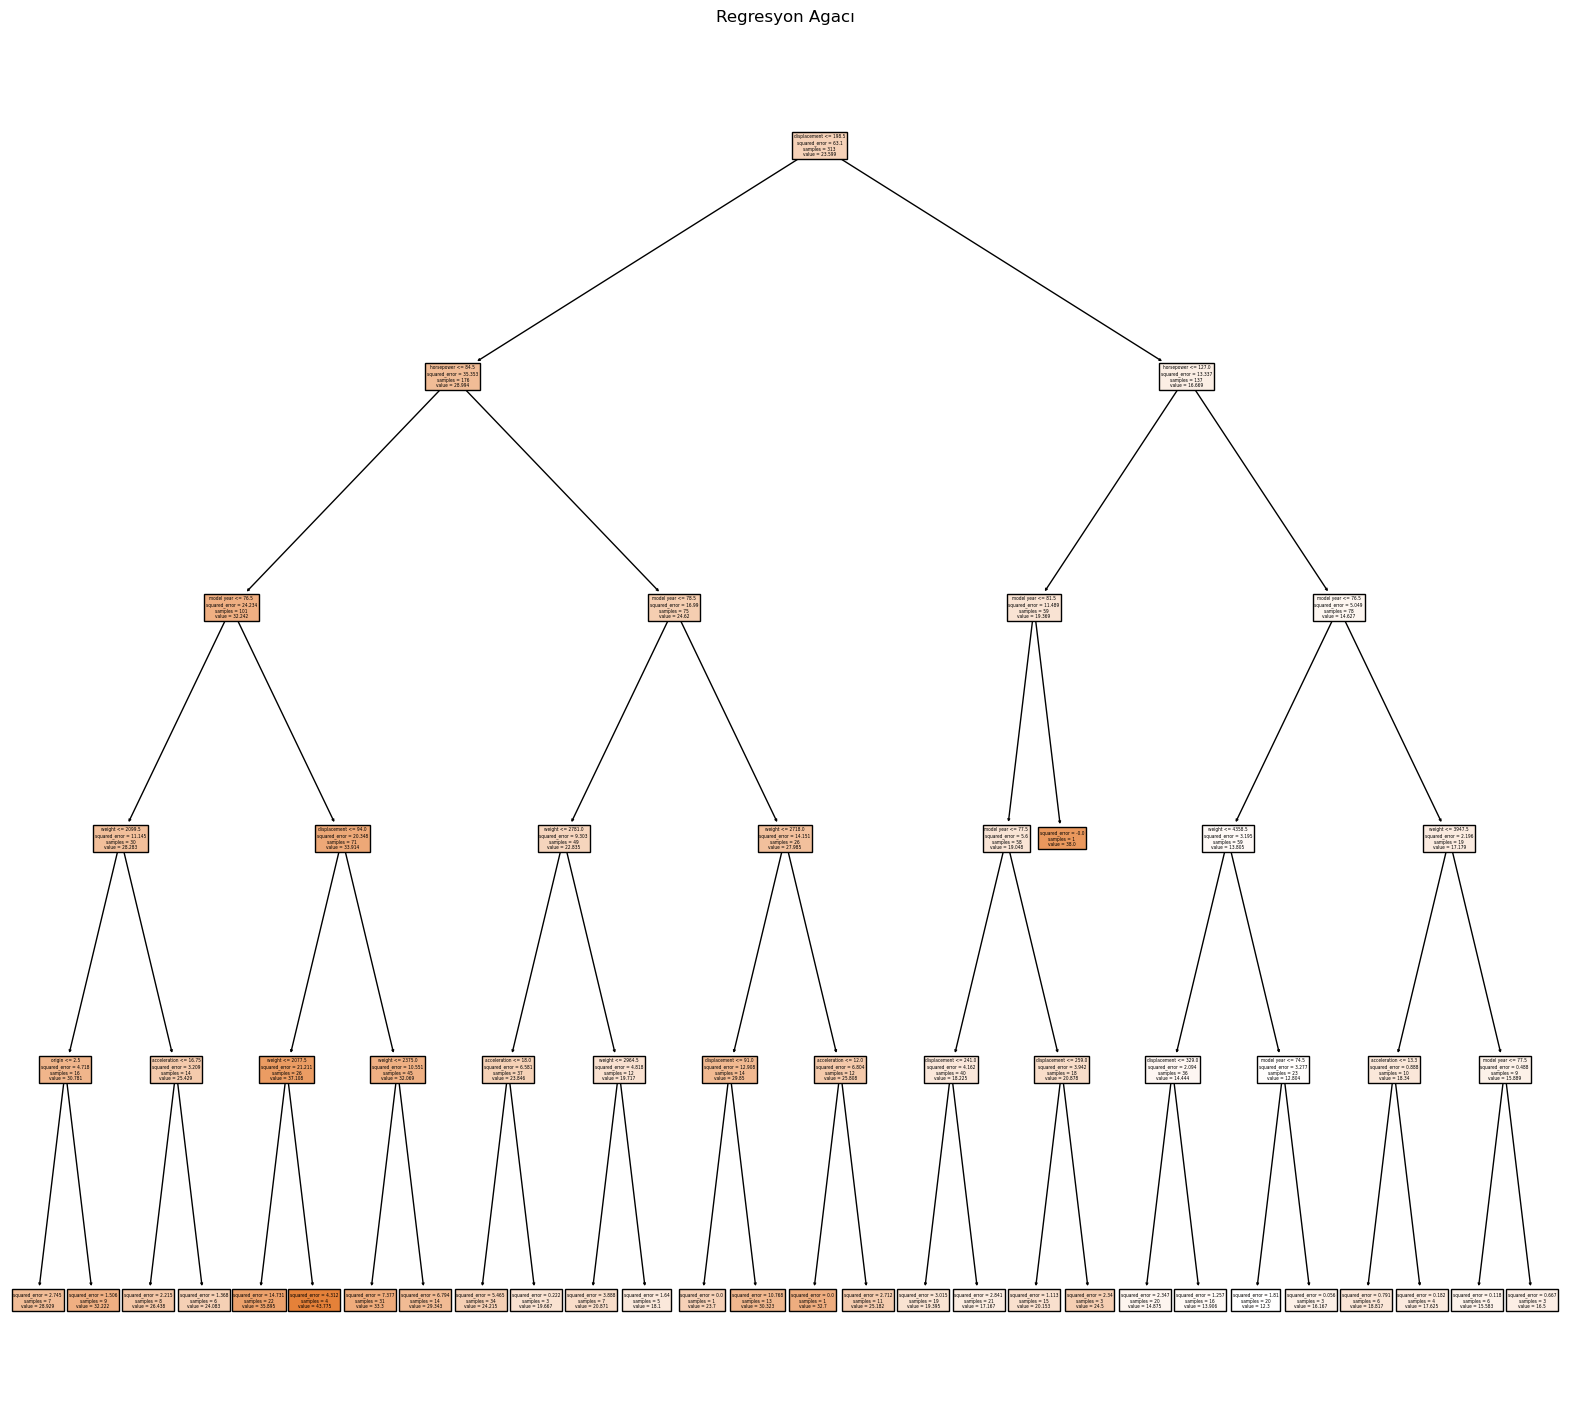

In [17]:
#Regresyon Agacı Görselleştirme
plt.figure(figsize=(20,18))
tree.plot_tree(model,filled=True,feature_names=["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"])
plt.title('Regresyon Agacı')